## Ashfaque Azad MSc Computer Science (Data Analytics)

@article{rauber2017foolbox,
  
  title={Foolbox: A Python toolbox to benchmark the robustness of machine learning models},
  
  author={Rauber, Jonas and Brendel, Wieland and Bethge, Matthias},
  
  journal={arXiv preprint arXiv:1707.04131},
  
  year={2017},
  
  url={http://arxiv.org/abs/1707.04131, https://github.com/bethgelab/foolbox},
  
  archivePrefix={arXiv},
  
  eprint={1707.04131},
}

In [0]:
!pip install image
!pip install foolbox
!pip install torch
!pip install torchvision

In [3]:
from google.colab import files
uploaded=files.upload()#upload the image 

Saving tiger.jpeg to tiger.jpeg


In [0]:
nameOfTheImage="tiger.jpeg"

In [0]:
# This part of the code is from https://github.com/bethgelab/foolbox
import os
# import PIL

import numpy as np



def imagenet_example(shape=(224, 224), data_format='channels_last'):
    """ Returns an example image and its imagenet class label.
    Parameters
    ----------
    shape : list of integers
        The shape of the returned image.
    data_format : str
        "channels_first" or "channels_last"
    Returns
    -------
    image : array_like
        The example image.
    label : int
        The imagenet label associated with the image.
    """
    assert len(shape) == 2
    assert data_format in ['channels_first', 'channels_last']

    from PIL import Image
    from urllib.request import urlretrieve
    path = os.path.join(nameOfTheImage)
    image = Image.open(path)
    image = image.resize(shape)
    image = np.asarray(image, dtype=np.float32)
    image = image[:, :, :3]
    assert image.shape == shape + (3,)
    if data_format == 'channels_first':
        image = np.transpose(image, (2, 0, 1))
    return image
  

In [0]:
import foolbox
import torch
import torchvision.models as models
import numpy as np

In [0]:
def RESNET18(targetClass):
  # instantiate the model (as per foolbox)
  resnet18 = models.resnet18(pretrained=True).eval()
  if torch.cuda.is_available():
      resnet18 = resnet18.cuda()
  mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
  std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
  fmodel = foolbox.models.PyTorchModel(
      resnet18, bounds=(0, 1), num_classes=1000, preprocessing=(mean, std))

  # get source image and label
  image = imagenet_example(data_format='channels_first')
  image = image / 255.  # because our model expects values in [0, 1]


  print('predicted class(RESNET)', np.argmax(fmodel.predictions(image)))

  from foolbox.criteria import TargetClassProbability

  target_class = targetClass#372 #https://gist.github.com/ageitgey/4e1342c10a71981d0b491e1b8227328b
  criterion = TargetClassProbability(target_class, p=0.85)

  # apply attack on source image
  attack = foolbox.attacks.LBFGSAttack(fmodel,criterion)

  # apply attack on source image
  adversarial = attack(image,np.argmax(fmodel.predictions(image)))

  print('adversarial class(RESNET)', np.argmax(fmodel.predictions(adversarial)))
  
  #returns image,model, adversarial
  return image,fmodel,adversarial

In [0]:
def VGG16(targetClass):
  # instantiate the model (as per foolbox)
  vgg16 = models.vgg16(pretrained=True).eval()
  if torch.cuda.is_available():
      vgg16 = vgg16.cuda()
  mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
  std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
  fmodel1 = foolbox.models.PyTorchModel(
      vgg16, bounds=(0, 1), num_classes=1000, preprocessing=(mean, std))

  # get source image and label
  image1 = imagenet_example(data_format='channels_first')
  image1 = image1 / 255.  # because our model expects values in [0, 1]


  print('predicted class(VGG16)', np.argmax(fmodel1.predictions(image1)))

  from foolbox.criteria import TargetClassProbability

  target_class1 = targetClass #https://gist.github.com/ageitgey/4e1342c10a71981d0b491e1b8227328b
  criterion1 = TargetClassProbability(target_class1, p=0.85)

  # apply attack on source image
  attack1 = foolbox.attacks.LBFGSAttack(fmodel1,criterion1)

  # apply attack on source image
  adversarial1 = attack1(image1,np.argmax(fmodel1.predictions(image1)))

  print('adversarial class(VGG16)', np.argmax(fmodel1.predictions(adversarial1)))
  
  return image1,fmodel1,adversarial1

In [0]:

def DENSENET():#targetClass):
  # instantiate the model (as per foolbox)
  densenet = models.densenet161(pretrained=True).eval()
  if torch.cuda.is_available():
      densenet = densenet.cuda()
  mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
  std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
  fmodel2 = foolbox.models.PyTorchModel(
      densenet, bounds=(0, 1), num_classes=1000, preprocessing=(mean, std))

  # get source image and label
  image2 = imagenet_example(data_format='channels_first')
  image2 = image2 / 255.  # because our model expects values in [0, 1]


  print('predicted class(DENSENET)', np.argmax(fmodel2.predictions(image2)))

  
  return image2,fmodel2

In [0]:
import numpy 
import cv2
def defense(altered):
  return cv2.medianBlur(altered,3)#median-filter defense

**Attacker knows 2 models VGG16 AND RESNET18**
 *Creates adversaries using these models.
Combines the pertubations. 
Adds to the original image. DenseNet is not attacked *

In [11]:
# Attacks
image,fmodel,adversarial=RESNET18(290)#290 is the target class
image1,fmodel1,adversarial1=VGG16(290)#290 is the target class
image2,fmodel2=DENSENET()#unattacked DENSENET model

predicted class(RESNET) 292
adversarial class(RESNET) 290


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:08<00:00, 63277176.51it/s]


predicted class(VGG16) 292
adversarial class(VGG16) 290


/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.torch/models/densenet161-8d451a50.pth
100%|██████████| 115730790/115730790 [00:02<00:00, 50439530.24it/s]


predicted class(DENSENET) 292


**ENSEMBLE**

In [0]:
def ensemble(inputImage):#Must be odd Numbers
  listPredictions=[]#list would contain the predictions
  listPredictions.append(np.argmax(fmodel.predictions(inputImage)))
  listPredictions.append(np.argmax(fmodel1.predictions(inputImage)))
  listPredictions.append(np.argmax(fmodel2.predictions(inputImage)))
  
  if(listPredictions.count(max(set(listPredictions),key=listPredictions.count))==1):#if the maximum class occurs just once
    return "***adversarial***"#in case all models predict different classes
  else:
    return max(set(listPredictions),key=listPredictions.count)#sends the class with maximum occurence

**Both ensemble and feature squeezer**

In [0]:
def defenseEnsemble(inputImage):
  print("Prediction Before Defense",ensemble(inputImage))
  print("Prediction After Defense",ensemble(defense(inputImage)))
  if(ensemble(inputImage)!=ensemble(defense(inputImage))):
    print("Warning:Adversarial Input")

**Creating the Perturbed Image**

In [0]:
#Differences
diffVGG=adversarial1-image1
diffRES=adversarial-image

In [0]:
perturb=image+diffRES+diffVGG#addition of the perturbation to the input image

In [22]:
defenseEnsemble(image)#sending the original image

Prediction Before Defense 292
Prediction After Defense 292


In [23]:
perturb=numpy.clip(perturb,0,1)
defenseEnsemble(perturb)#sending in the perturbed image

Prediction Before Defense 290
Prediction After Defense 292


## Plotting alpha'

(-0.5, 223.5, 223.5, -0.5)

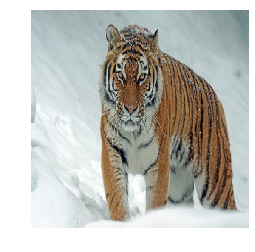

In [24]:

perturb=np.transpose(perturb, (1, 2, 0))
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1, 1, 1)
plt.imshow(perturb)
plt.axis('off')